homework 9
---
due: June 1 2022

authors: pegler, prüwasser, scheftner

## import libraries ...

... and prepare the data from **tutorial 11**

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

N = 200

# create covariance matrix and adapt it a bit
M_cov = np.eye(2)
M_cov[0, 1] = 1
M_cov[1, 0] = 1
M_cov[1, 1] = 1
M_cov[0, 0] = 3

# create 3 arrays with different means and stack them
A_1 = np.random.multivariate_normal([-4, 0], M_cov, N)
A_2 = np.random.multivariate_normal([5, 2], M_cov, N)
A_3 = np.random.multivariate_normal([1, 1], M_cov, N)
X = np.vstack((A_1, A_2, A_3))

# create model and fit the data
gm = GaussianMixture(n_components = 3)
gm.fit(X)
pred = gm.predict(X)

## Part 1 

- use the above code to fit a gaussian mixture model to the same data with the number of clusters/components changing from 2 to 8. (all values from 2 to 8 with for loop).
- for each iteration, calculate the model fit measures BIC and AIC
- graph on a single graph, the number of iterations on the X-axis, and both AIC and BIC on the Y axis (with a line for AIC and another for BIC), 
- remember to add axis labels and legends (to see which one is AIC, which is BIC), try to make it look nice, by chaning fontsize, color, linewidth etc. 
- remember AIC and BIC are model fit measures, basedon the log-likelihood, and lower values indicate better model fit

## Part 2: implement k-means with numpy

- number of centroids optional
- intialize the centroids randomly (within the range of the data)
- number of steps optional 
- keep track of distance (distance to closest centroid should descrease)

## Part 3: K-means on the same data  (do at the end)

try to repeat the above workflow, but with kmeans, instead of gaussian mixture, and visualize the result

on the same data, do you get the same division with the 2 methods?

In [2]:
# your code

## Part 4: Upload a photo of your choice

due to computational issues, import minibatch kmeans

resolution (742, 990, 3)


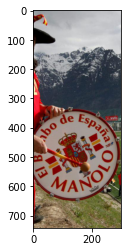

In [91]:
from sklearn.cluster import MiniBatchKMeans

from PIL import Image
image = np.asarray(Image.open("img/manolo.jpg"))
print('resolution',np.shape(image))

plt.imshow(image[:,220:520,:]);

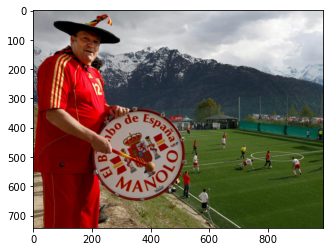

In [4]:
plt.imshow(image);

transform image to monochrome, using numpy

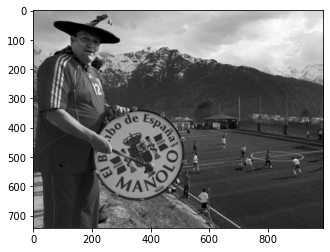

In [5]:
image_mono = np.mean(image, 2)
image_mono_1d = image_mono.reshape(-1,1)  # 1 dimensional data array for machine learning

plt.imshow(image_mono, cmap = "gray");

### K-means algorithm

if you have a large image, better to use MiniBatchKMeans

In [6]:
Km = MiniBatchKMeans(n_clusters = 3)

use your 1d arrangment of pixel values, to fit the model

In [7]:
Km.fit(image_mono_1d)

MiniBatchKMeans(n_clusters=3)

In [8]:
Km.cluster_centers_

array([[ 95.14512982],
       [188.37413632],
       [ 46.47888769]])

In [9]:
image_mono_1d[0:100].T

array([[157.33333333, 156.33333333, 156.33333333, 155.33333333,
        155.33333333, 156.33333333, 156.33333333, 157.33333333,
        158.33333333, 157.33333333, 157.33333333, 156.33333333,
        156.33333333, 157.33333333, 157.33333333, 158.33333333,
        157.33333333, 157.33333333, 158.33333333, 159.33333333,
        159.33333333, 160.33333333, 161.33333333, 161.33333333,
        160.33333333, 160.33333333, 160.33333333, 161.33333333,
        163.33333333, 165.33333333, 167.33333333, 168.33333333,
        170.33333333, 169.33333333, 168.33333333, 167.33333333,
        166.33333333, 166.33333333, 166.33333333, 166.33333333,
        166.33333333, 166.33333333, 166.33333333, 166.33333333,
        166.33333333, 166.33333333, 166.33333333, 166.33333333,
        167.        , 167.        , 167.        , 167.        ,
        167.        , 167.        , 167.        , 167.        ,
        166.        , 166.        , 165.        , 164.        ,
        164.        , 163.        , 162.

In [10]:
len(image_mono_1d)

734580

In [11]:
Km.predict(image_mono_1d)[0:100]  # print prediction for first 100 pixels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Recover clustered image

The tricky part is recovering the image, based on the model prediction. For this, you will need to combine the `predict()` and the `cluster_centers_`. Finally you have to `reshape` from 1D to 2D to get back an image, that you can display.

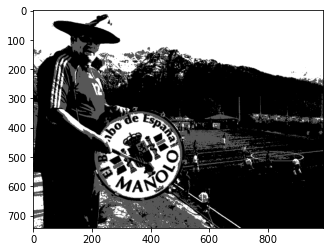

In [12]:
image_mono_recovered = Km.predict(image_mono_1d).reshape(np.shape(image_mono))
image_mono_recovered = Km.cluster_centers_[image_mono_recovered]

plt.imshow(image_mono_recovered, cmap = "gray")

### Principal component analysis

lets test it on the same image as above.

remember pca uses correlation (covariance) between columns for that can be used for a compressed represenation..


In [13]:
from sklearn.decomposition import PCA

pc = PCA(n_components=2)

pc.fit(image_mono)

PCA(n_components=2)

 fit_transform is the same as reducing the data, with the components of the fitted PCA:   gray.dot(pc.components_.T)

In [14]:
image_mono_reduced = pc.fit_transform(image_mono) 

print(pc.explained_variance_)
print(pc.explained_variance_ratio_)

[2570141.13189994  276984.64559558]
[0.65540749 0.0706334 ]


In [15]:
print('original shape', np.shape(image_mono))
print('components',np.shape(pc.components_))  # components_ contains the "loadings", how much each columns contributes to the PCA-s
print('reduced data',np.shape(image_mono_reduced))

original shape (742, 990)
components (2, 990)
reduced data (742, 2)


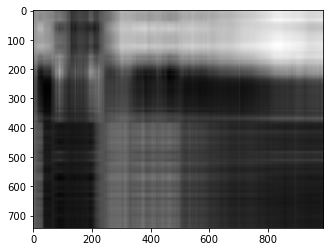

In [16]:
plt.imshow(pc.inverse_transform(image_mono_reduced), cmap='gray')

#gray.dot(pc.components_.T

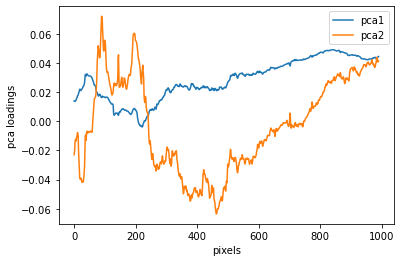

In [17]:
plt.plot(pc.components_[0,:],label='pca1')
plt.plot(pc.components_[1,:],label='pca2')
plt.xlabel('pixels')
plt.ylabel('pca loadings')
plt.legend()

PCA 1 vs 2, color coded by column number

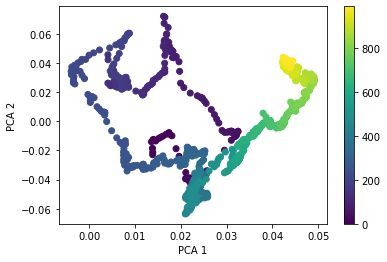

In [20]:
plt.scatter(pc.components_[0,:],pc.components_[1,:],c=np.arange(np.shape(image_mono)[1])) #,label='pca1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()

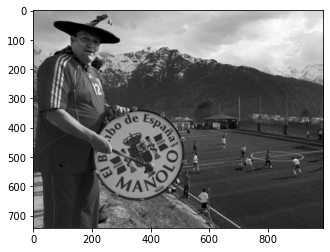

In [22]:
plt.imshow(image_mono, cmap='gray');

### Testing multiple decompositions

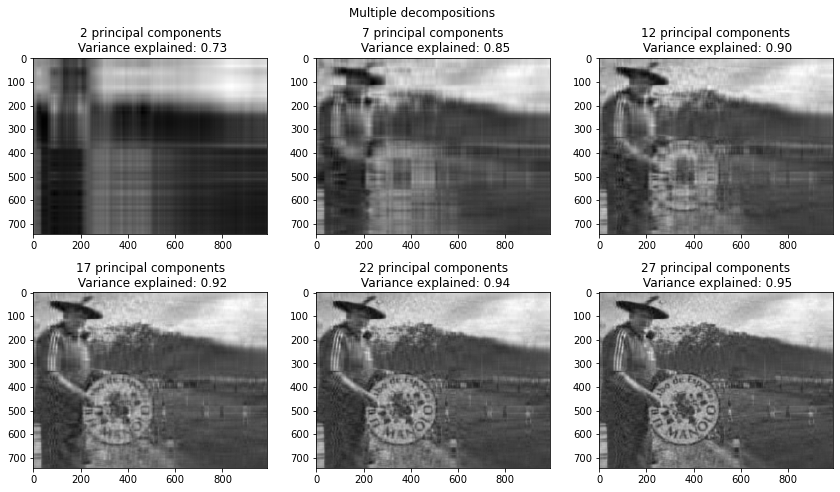

In [44]:
plt.figure(figsize = (12, 10))
for i, nc in enumerate(np.arange(2, 30, 5)):
    plt.subplot(3, 3, i + 1)
    pc = PCA(n_components = nc)
    reduced = pc.fit_transform(image_mono)
    plt.imshow(pc.inverse_transform(reduced),cmap='gray')
    plt.title(f"{nc} principal components\n Variance explained: {np.sum(pc.explained_variance_ratio_):,.2f}")
    plt.suptitle("Multiple decompositions")
    plt.tight_layout()

## Part 5: Simulating multivariate data with many predictors

Text(0.5, 1.0, 'Random covariance matrix')

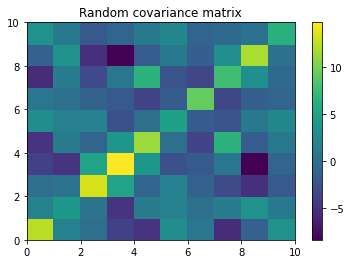

In [55]:
n_vars = 10
means = np.zeros(n_vars) #  all with zero mean
n_points = 200 # number of data points
A = np.random.normal(0,1,(n_vars, n_vars))
M_cov = np.dot(A, A.transpose())

# create random dataset with n predictor variables
X_tab = np.random.multivariate_normal(means, M_cov, n_points)

plt.pcolor(M_cov)
plt.colorbar()
plt.title('Random covariance matrix')

with the above covariance matrix, we made a random dataset with 10 predictors

1. calculate the empirical correlation matrix with numpy `corrcoef` (beware on row and columns defaults)
2. or write your own code, and use `scipy.stats.pearsonr`
3. visualize the empiricial correlation matrix as above

Text(0.5, 1.0, 'Empirical correlation matrix')

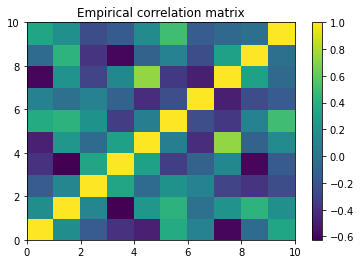

In [58]:
M_cor = np.corrcoef(X_tab.T)
plt.pcolor(M_cor)
plt.colorbar()
plt.title('Empirical correlation matrix')

#### Print the first 20 rows ...
... and all columns of Xtab to "see" the data

In [52]:
print(X_tab[: 20, :])

[[ 2.37123289  1.33455882 -4.89640222 -1.91562002 -2.46468514  1.12458139
  -5.05630373 -3.94543572 -0.57300823  0.97197826]
 [-0.74618933  4.75134494  0.5393641   0.4580725   3.56301922 -1.97059722
   0.14359206  4.69156994  2.47473341 -1.55206999]
 [ 3.51083928  5.39288734  0.16109008 -3.83590373  2.69194186  0.92494836
  -0.92941587  7.39991356  2.80115201 -2.54110293]
 [-1.47654532  1.33252627  0.72612886 -3.55154405 -2.58736802 -2.63118109
   4.53393614  1.330649   -3.50192287 -0.75340041]
 [ 2.4277211   2.37558189 -3.33934729 -1.49810071 -1.60499477  3.66160412
  -5.95614087 -1.21730808  1.2837043   1.39488233]
 [ 1.70561682  4.27214309  1.46526921 -0.41419446  0.81507342 -0.05863964
  -4.30554731 -5.74659843 -2.25393003  2.21217267]
 [ 0.36930911 -2.22131227 -3.10088316  1.37442403  1.50375639  3.52407431
  -1.91699031  2.00340691  0.59123918  0.92311511]
 [ 0.55509923  1.89432622 -0.43970341  0.17896816  1.24783757 -2.38573774
  -0.65621429 -3.40270906  1.54425864  2.17864053]


#### PCA on simulated data

fitting pca and transforming the data into lower dimensions

In [64]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_tab)

print(f"Data transformed from shape {np.shape(X_tab)} to {np.shape(X_reduced)}")

Data transformed from shape (200, 10) to (200, 2)


visualize data, after dimensionality reduction

Text(0, 0.5, 'PC 2')

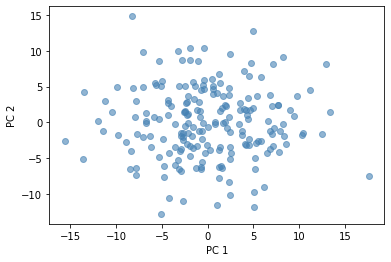

In [69]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = "steelblue", alpha = 0.6)
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 2')

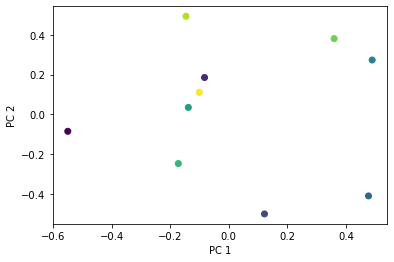

In [70]:
plt.scatter(pca.components_[0, :], pca.components_[1, :], c = np.arange(n_vars))
plt.xlabel('PC 1')
plt.ylabel('PC 2')

## Part 6: Visualizing gaussian mixture, with predicted probabilities

set up params and fit model

In [74]:
n_components = 4
gm = GaussianMixture(n_components = n_components)
gm.fit(X_tab)

GaussianMixture(n_components=4)

make predictions, and visualize

Shape of prediction matrix: (200, 4)


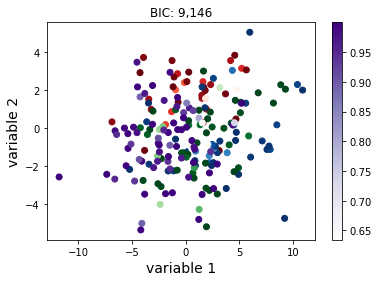

In [84]:
cols = ['Reds','Blues','Greens','Purples','Greys']  #,'olive','orange','darkred','marine']
pred = gm.predict(X_tab)
pred_prob = gm.predict_proba(X_tab)
print(f"Shape of prediction matrix: {np.shape(pred_prob)}")

plt.figure()
for c in range(n_components):
    plt.scatter(X_tab[pred == c, 0], X_tab[pred == c, 1], c = np.max(pred_prob[pred == c, :], 1), cmap = cols[c]) 
plt.colorbar()
plt.xlabel('variable 1',fontsize=14)
plt.ylabel('variable 2',fontsize=14)
plt.title(f"BIC: {gm.bic(X_tab):,.0f}");